Marçal Henrique Moreira  
Discente em Engenharia de Computação pelo IFMG - Campus Bambuí  
GitHub: [github.com/marcalhenrique](https://github.com/marcalhenrique)  
March 2023  
---

----------------

# Estudo de OCR com Pytesseract e OpenCV

In [34]:
# Importando Bibliotecas
import numpy as np
import cv2
import pytesseract

## 1. Teste Inicial

A função ```cv2.imread()``` é usada para carregar uma imagem. O primeiro argumento é o caminho da imagem. O segundo argumento é um flag que especifica a maneira como a imagem deve ser lida.  
A imagem de teste está em escala de cinza, por isso não é necessário converter a imagem para RGB.  
Como a imagem de teste nao precisa de nenhum tratamento, podemos utilizar o pytesseract para extrair o texto da imagem com a função ```pytesseract.image_to_string(img)```.

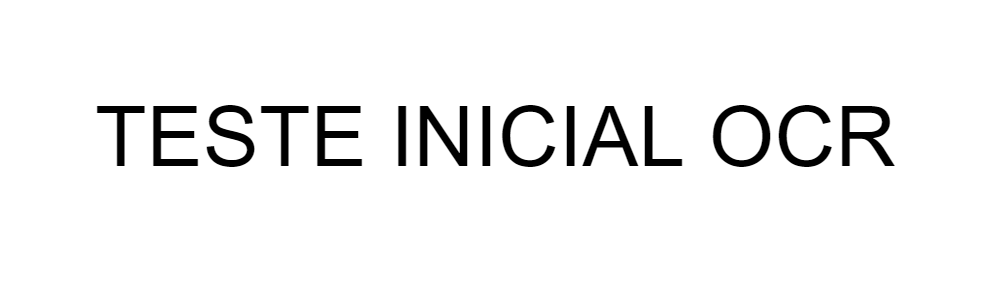

Texto da imagem:  TESTE INICIAL OCR



In [35]:
img_teste = cv2.imread('images_folder/teste.png') # Método que lê a imagem do diretório
img_teste = cv2.cvtColor(img_teste, cv2.COLOR_BGR2RGB) # Converte a imagem de BGR para RGB
display(Image.fromarray(img_teste)) # Exibe a imagem no notebook
# --------
text = pytesseract.image_to_string(img_teste) # Método que converte a imagem em texto
print("Texto da imagem: ", text)


## 2. Teste Inicial com Imagem em RGB

Em imagens coloridas o OpenCV carrega os canais de cores em ordem BGR (Blue, Green, Red). É necessário converter a imagem para RGB para utilizar o display() do IPython para mostrar a imagem original.
Para converter a imagem para RGB, usamos a função ```cv2.cvtColor()``` com o argumento ```cv2.COLOR_BGR2RGB```.

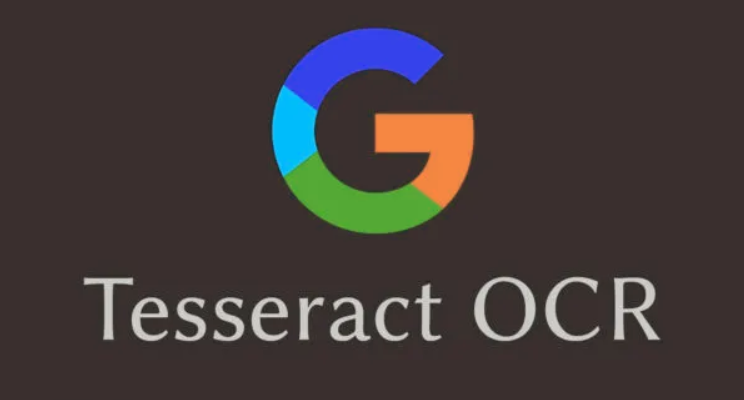

In [36]:
img_ocr_bgr = cv2.imread('images_folder/ocr.png')
display(Image.fromarray(img_ocr_bgr)) # Imagem em ordem BGR

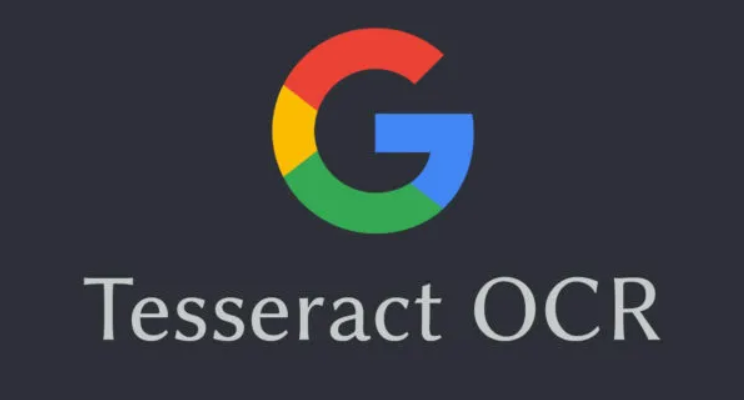

In [37]:
img_ocr_rgb = cv2.cvtColor(img_ocr_bgr, cv2.COLOR_BGR2RGB)
display(Image.fromarray(img_ocr_rgb)) # Imagem em ordem RGB

É possível utilizar o cv2.cvtColor() para converter a imagem para outras cores. Basta utilizar o argumento  ```cv2.COLOR_BGR2GRAY``` para converter a imagem para escala de cinza.    
Esses argumentos estão disponíveis na documentação do OpenCV.  
Link para a documentação: [OpenCV - Color Space Conversion](https://docs.opencv.org/3.4/d8/d01/group__imgproc__color__conversions.html)

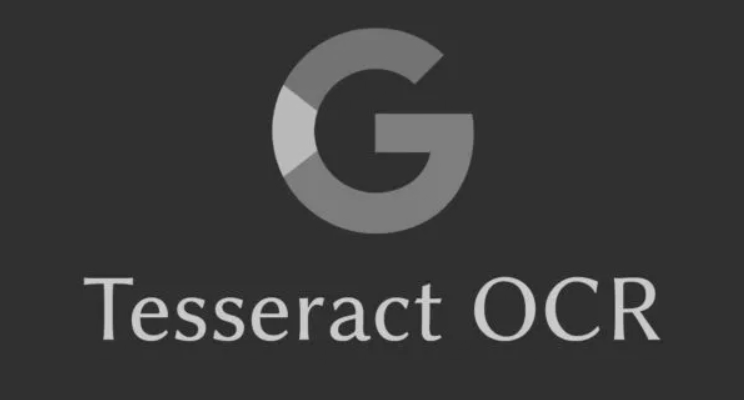

In [38]:
img_ocr_gray = cv2.cvtColor(img_ocr_rgb, cv2.COLOR_RGB2GRAY)
display(Image.fromarray(img_ocr_gray)) # Imagem em escala de cinza

Ao converter a imagem para cinza, é notável a perca de informações como as cores do simbolo da google ter ficado apenas com duas tonalidades de cinza.  
Geralmente isso é corrigido com tratamentos de imagem, como o uso de filtros.  
Com a imagem em escala de cinza e em RGB, podemos utilizar a função ```pytesseract.image_to_string(img)``` e ver como o pytesseract se comporta com cada uma das imagens.

In [40]:
text_rgb = pytesseract.image_to_string(img_ocr_rgb)
text_gray = pytesseract.image_to_string(img_ocr_gray)
print("Texto da imagem em RGB: ", text_rgb)
print("-------------------------")
print("Texto da imagem em cinza: ", text_gray)



Texto da imagem em RGB:  c

Tesseract OCR

-------------------------
Texto da imagem em cinza:  C

Tesseract OCR



É possível notar que o pytesseract se comporta diferente com cada uma das imagens.  
Existe um erro em ambas as imagens o "G" foi posto como "C", entretanto na imagem com escala de cinza o C foi posto em maiúsculo que se aproxima mais da letra G.

## 3. Utilizando Imagens com Texto

Até o momento, foi utilizado imagens textos simples. Utilizando uma imagem com um texto mais complexo, é possível estudar como o pytesseract se comporta com imagens com mais informações.

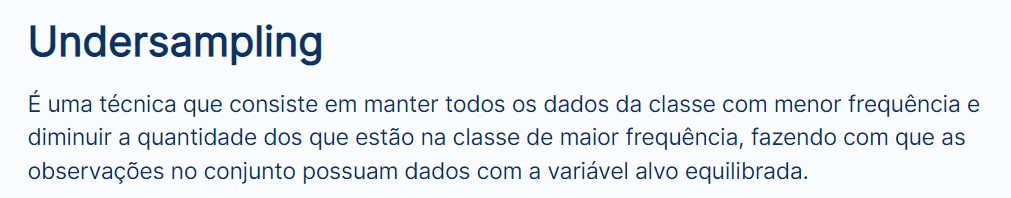

Texto da imagem em RGB: 

 Undersampling

E uma técnica que consiste em manter todos os dados da classe com menor frequéncia e
diminuir a quantidade dos que estdo na classe de maior frequéncia, fazendo com que as
observagées no conjunto possuam dados com a variavel alvo equilibrada.



In [52]:
img_example_text = cv2.imread('images_folder/undersampling.png')
img_example_text = cv2.cvtColor(img_example_text, cv2.COLOR_BGR2RGB)
display(Image.fromarray(img_example_text))
# --------------------------------------
example_text_rgb = pytesseract.image_to_string(img_example_text)

print("Texto da imagem em RGB: \n\n", example_text_rgb)



As palavras com acentos tiveram erros de reconhecimento. Pois o pytesseract não foi especificado o idioma da imagem.  
Ao utilizar o comando ```tesseract --list-lang``` no terminal, é possível ver os idiomas disponíveis para o pytesseract. Nativamente o pytesseract não possui suporte para português. Para fazer o download do idioma português, é necessário utilizar o comando ```sudo apt install tesseract-ocr-por```.  
O argumento ```lang='por'``` é passado para a função ```pytesseract.image_to_string(img, lang='por')``` para especificar o idioma da imagem.

In [55]:
example_text_rgb = pytesseract.image_to_string(img_example_text, lang='por')
print("Texto da imagem com argumento de linguagem em português: \n\n", example_text_rgb)

Texto da imagem com argumento de linguagem em português: 

 Undersampling

É uma técnica que consiste em manter todos os dados da classe com menor frequência e
diminuir a quantidade dos que estão na classe de maior frequência, fazendo com que as
observações no conjunto possuam dados com a variável alvo equilibrada.

